In [43]:
!pip install pyts

You should consider upgrading via the 'C:\darsh\Research Internship\research\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
from pyts.image import GramianAngularField

In [1]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json("data/events/events_Spain.json")
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


In [113]:

df = df.loc[df['matchId'] == 2565927]
df = df.loc[df['teamId'] == 675]
df = df.loc[df['matchPeriod'] == '1H']
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
626794,8,Simple pass,[{'id': 1801}],3563,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 34}]",2565927,Pass,675,1H,6.950595,85,253300474
626795,8,Simple pass,[{'id': 1801}],8287,"[{'y': 53, 'x': 34}, {'y': 33, 'x': 36}]",2565927,Pass,675,1H,8.083157,85,253300475
626796,8,Simple pass,[{'id': 1801}],14723,"[{'y': 33, 'x': 36}, {'y': 49, 'x': 33}]",2565927,Pass,675,1H,8.783134,85,253300476
626797,8,Simple pass,[{'id': 1801}],40756,"[{'y': 49, 'x': 33}, {'y': 12, 'x': 30}]",2565927,Pass,675,1H,10.519390,85,253300477
626798,8,Simple pass,[{'id': 1801}],3306,"[{'y': 12, 'x': 30}, {'y': 21, 'x': 38}]",2565927,Pass,675,1H,12.099223,85,253300478


In [114]:
df.shape

(529, 12)

In [115]:
time_event = df[['eventSec', 'eventName']]

In [116]:
time_event.head()

,eventSec,eventName
626794,6.950595,Pass
626795,8.083157,Pass
626796,8.783134,Pass
626797,10.519390,Pass
626798,12.099223,Pass


In [117]:
time_event['count'] = 1

In [118]:
for index,row in time_event.iterrows():
    if row['eventName'] != 'Pass':
        time_event.at[index, 'count'] = 0
    #one_hot_encoded_data.at[index,'eventSec'] = rows['eventSec']


In [119]:
time_event

,eventSec,eventName,count
626794,6.950595,Pass,1
626795,8.083157,Pass,1
626796,8.783134,Pass,1
626797,10.519390,Pass,1
626798,12.099223,Pass,1
...,...,...,...
627717,2667.588461,Pass,1
627718,2671.101604,Pass,1
627719,2671.442237,Pass,1
627720,2675.806456,Pass,1


In [94]:
time_event = time_event[['eventSec', 'count']]

In [120]:
cumsum = 0
for index,row in time_event.iterrows():
    time_event.at[index, 'count'] = row['count'] + cumsum
    cumsum = row['count'] + cumsum

In [121]:
time_event.head()

,eventSec,eventName,count
626794,6.950595,Pass,1
626795,8.083157,Pass,2
626796,8.783134,Pass,3
626797,10.519390,Pass,4
626798,12.099223,Pass,5


In [36]:
total = time_event['count'][len(time_event)-1]
# datatype = {'count': float}
# time_event = time_event.astype(datatype)
# time_event.head()
for index,row in time_event.iterrows():
    time_event.at[index, 'count'] = row['count']/total

In [45]:
time_event.head()
temp = time_event[['count', 'eventSec']]
temp.head()

,count,eventSec
0,0.008850,2.994582
1,0.017699,3.137020
2,0.026549,6.709668
3,0.035398,8.805497
4,0.044248,14.047492


In [122]:
time = []
count = []
for index,row in time_event.iterrows():
    count.append(row['count'])
    time.append(row['eventSec'])

In [123]:
series = []
series.append(time)
series.append(count)

In [124]:
series

[[6.950595,
  8.083157,
  8.783133999999997,
  10.519390000000001,
  12.099223000000002,
  12.602196999999997,
  13.67774,
  15.570818000000003,
  19.603533,
  22.616725000000002,
  25.539281000000003,
  28.028191000000007,
  28.962464999999995,
  33.019754000000006,
  33.243035000000006,
  35.394543999999996,
  37.644272,
  40.422124999999994,
  42.699262000000004,
  59.60201000000001,
  65.941791,
  76.212503,
  78.24698,
  84.673944,
  87.355442,
  89.456405,
  96.661551,
  99.954218,
  104.39935700000001,
  107.23004900000001,
  109.82490000000001,
  110.39865,
  110.91948400000001,
  119.391232,
  158.792784,
  161.372901,
  181.022012,
  184.234714,
  191.489467,
  193.277094,
  211.313892,
  212.165641,
  213.736693,
  215.104144,
  220.918094,
  227.97256399999998,
  231.97840300000001,
  235.435833,
  236.74608,
  241.039178,
  247.753216,
  248.936641,
  251.00284,
  253.73933499999998,
  254.875433,
  257.57372,
  258.379338,
  261.022066,
  263.359172,
  264.630937,
  266.1

In [38]:
one_hot_encoded_data = pd.get_dummies(time_event, columns = ['eventName'])
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['index'])
one_hot_encoded_data.head()

KeyError: "None of [Index(['eventName'], dtype='object')] are in the [columns]"

In [9]:

for index,rows in one_hot_encoded_data.iterrows() :
    if rows['eventSec']>0:
        rows['eventSec'] = rows['eventSec'] + (2 - rows['eventSec']) % 2
    #fe.set_value(index,'eventSec',rows['eventSec'])
    one_hot_encoded_data.at[index,'eventSec'] = rows['eventSec']
    
    

In [10]:
one_hot_encoded_data.head()

,eventSec,eventName_Pass
0,4.0,1
1,4.0,1
2,8.0,1
3,10.0,1
4,16.0,1


In [268]:
one_hot_encoded_data = one_hot_encoded_data.groupby('eventSec').sum()

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(time_event)

        eventSec  count
0       2.994582      1
1       3.137020      2
2       6.709668      3
3       8.805497      4
4      14.047492      5
5      18.480831      6
6      23.978291      7
7      28.831334      8
8      30.844379      9
9      34.267339     10
10     36.051867     11
11     39.291345     12
12     40.568891     13
15     49.526601     13
19     57.493138     13
21     58.909178     13
23     62.198589     13
24     83.100786     13
29    119.589776     13
30    128.523028     13
31    131.339304     13
37    155.933483     14
38    165.998085     15
39    166.859710     16
40    168.971273     17
41    174.078775     18
42    178.664114     19
43    181.665639     20
47    204.231852     20
49    211.660160     20
50    213.736626     21
51    219.011558     22
52    223.910502     23
53    229.132718     24
54    232.830516     25
55    234.759297     26
56    237.649661     26
57    243.077555     26
59    277.248966     27
60    278.645906     28
61    280.517740

In [271]:
one_hot_encoded_data.head()

,eventName_Pass
eventSec,
4.0,2
8.0,1
10.0,1
16.0,1
20.0,1


In [270]:
grt  = pd.concat([one_hot_encoded_data[['eventName_Pass']].cumsum(),one_hot_encoded_data['eventSec']],axis = 1)

KeyError: 'eventSec'

In [238]:
arr = []
for i in range(len(time_event)):
    arr.append(i+1)
time_event['eventName'] = arr

In [261]:
#finaldf = pd.DataFrame(one_hot_encoded_data, columns = ['time', 'pass'])


In [262]:
finaldf.head()

,time,pass


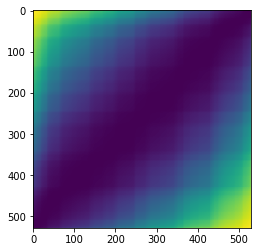

In [127]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

Xtrain  =  series
#Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField()
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)
#
plt.imshow(im_train[0])
plt.show()


In [41]:
for index,rows in time_event.iterrows():
    time_event.at(index, 'eventName') = index + 1

SyntaxError: cannot assign to function call (146407154.py, line 2)

In [42]:
for index,rows in df.iterrows():
    if (rows['matchId'] == 2565548):
        df = df.drop(index)

In [37]:
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1485,8,Simple pass,[{'id': 1801}],40770,"[{'y': 49, 'x': 49}, {'y': 25, 'x': 47}]",2565549,Pass,687,1H,0.994583,85,180054517
1486,8,Simple pass,[{'id': 1801}],3676,"[{'y': 25, 'x': 47}, {'y': 25, 'x': 28}]",2565549,Pass,687,1H,5.932613,85,180054518
1487,8,Simple pass,[{'id': 1801}],3828,"[{'y': 25, 'x': 28}, {'y': 62, 'x': 27}]",2565549,Pass,687,1H,8.648801,85,180054519
1488,8,Simple pass,[{'id': 1801}],278288,"[{'y': 62, 'x': 27}, {'y': 45, 'x': 9}]",2565549,Pass,687,1H,11.802546,85,180054520
1489,8,Launch,[{'id': 1801}],86212,"[{'y': 45, 'x': 9}, {'y': 5, 'x': 45}]",2565549,Pass,687,1H,14.401295,84,180054521


In [56]:
time_event = df[['eventSec', 'eventName','matchId','teamId']]


In [57]:
time_event = time_event.loc[time_event['matchId'] == 2565549]
time_event.shape

(1548, 4)

In [58]:
fix_event = pd.DataFrame(time_event)
fe = fix_event.reset_index()

In [59]:
fe.head()#match id = 2576041 

,index,eventSec,eventName,matchId,teamId
0,1485,0.994583,Pass,2565549,687
1,1486,5.932613,Pass,2565549,687
2,1487,8.648801,Pass,2565549,687
3,1488,11.802546,Pass,2565549,687
4,1489,14.401295,Pass,2565549,687


In [60]:
fe = fe.drop(columns=['index', 'matchId'])

In [61]:
fe.head()

,eventSec,eventName,teamId
0,0.994583,Pass,687
1,5.932613,Pass,687
2,8.648801,Pass,687
3,11.802546,Pass,687
4,14.401295,Pass,687


In [62]:
fe.tail()

,eventSec,eventName,teamId
1543,2985.953255,Others on the ball,687
1544,2988.083802,Interruption,692
1545,3011.523471,Free Kick,692
1546,3013.037653,Goalkeeper leaving line,687
1547,3013.117251,Duel,692


In [111]:
ht = fe.loc[fe['teamId']==692]
ht = ht.drop(columns=['teamId'])
ht

,eventSec,eventName
5,18.0,Duel
8,22.0,Duel
9,22.0,Pass
11,24.0,Duel
18,36.0,Duel
...,...,...
1541,2982.0,Duel
1542,2984.0,Pass
1544,2990.0,Interruption
1545,3012.0,Free Kick


In [112]:

for index,rows in fe.iterrows() :
    if rows['eventSec']>0:
        rows['eventSec'] = rows['eventSec'] + (2 - rows['eventSec']) % 2
    #fe.set_value(index,'eventSec',rows['eventSec'])
    fe.at[index,'eventSec'] = rows['eventSec']
    
    
    

In [113]:
one_hot_encoded_data = pd.get_dummies(ht, columns = ['eventName'])
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['index'])
one_hot_encoded_data.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,18.0,1,0,0,0,0,0,0,0,0,0
1,22.0,1,0,0,0,0,0,0,0,0,0
2,22.0,0,0,0,0,0,0,0,1,0,0
3,24.0,1,0,0,0,0,0,0,0,0,0
4,36.0,1,0,0,0,0,0,0,0,0,0


In [114]:
one_hot_encoded_data.shape

(832, 11)

In [115]:
rslt_df = one_hot_encoded_data.sort_values(by = 'eventSec')
rslt_df.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
415,4.0,0,0,0,0,0,0,0,1,0,0
416,6.0,0,0,0,0,0,0,0,1,0,0
417,10.0,1,0,0,0,0,0,0,0,0,0
418,12.0,0,0,0,0,0,0,0,1,0,0
420,14.0,1,0,0,0,0,0,0,0,0,0


In [116]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(rslt_df)

     eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
415       4.0               0               0                    0   
416       6.0               0               0                    0   
417      10.0               1               0                    0   
418      12.0               0               0                    0   
420      14.0               1               0                    0   
419      14.0               0               0                    0   
421      16.0               0               1                    0   
0        18.0               1               0                    0   
1        22.0               1               0                    0   
2        22.0               0               0                    0   
3        24.0               1               0                    0   
422      30.0               0               0                    1   
423      32.0               0               0                    0   
424      34.0       

In [117]:
one_hot_encoded_data = one_hot_encoded_data.groupby('eventSec').sum()

In [118]:
one_hot_encoded_data.shape

(657, 10)

In [119]:
one_hot_encoded_data.reset_index(inplace=True)

In [120]:
one_hot_encoded_data.shape

(657, 11)

In [121]:
one_hot_encoded_data.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,4.0,0,0,0,0,0,0,0,1,0,0
1,6.0,0,0,0,0,0,0,0,1,0,0
2,10.0,1,0,0,0,0,0,0,0,0,0
3,12.0,0,0,0,0,0,0,0,1,0,0
4,14.0,1,0,0,0,0,0,0,1,0,0


In [122]:
one_hot_encoded_data['eventName_Free Kick'].cumsum()
#,'one_hot_encoded_data','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot'

0       0
1       0
2       0
3       0
4       0
       ..
652    46
653    46
654    46
655    47
656    47
Name: eventName_Free Kick, Length: 657, dtype: uint32

In [123]:
heat = one_hot_encoded_data

In [124]:
heat.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,4.0,0,0,0,0,0,0,0,1,0,0
1,6.0,0,0,0,0,0,0,0,1,0,0
2,10.0,1,0,0,0,0,0,0,0,0,0
3,12.0,0,0,0,0,0,0,0,1,0,0
4,14.0,1,0,0,0,0,0,0,1,0,0


In [125]:
heat.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,4.0,0,0,0,0,0,0,0,1,0,0
1,6.0,0,0,0,0,0,0,0,1,0,0
2,10.0,1,0,0,0,0,0,0,0,0,0
3,12.0,0,0,0,0,0,0,0,1,0,0
4,14.0,1,0,0,0,0,0,0,1,0,0


In [169]:
grt  = pd.concat([heat[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot']].cumsum(),heat['eventSec']],axis = 1)

In [170]:
grt.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventSec
0,0,0,0,0,0,0,1,0,0,4.0
1,0,0,0,0,0,0,2,0,0,6.0
2,1,0,0,0,0,0,2,0,0,10.0
3,1,0,0,0,0,0,3,0,0,12.0
4,2,0,0,0,0,0,4,0,0,14.0


In [163]:
grt = grt.drop(columns=['eventSec'])
grt.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,2,0,0
2,1,0,0,0,0,0,2,0,0
3,1,0,0,0,0,0,3,0,0
4,2,0,0,0,0,0,4,0,0


In [171]:
type1 = {'eventName_Duel': float, 'eventName_Foul': float, 'eventName_Free Kick': float, 'eventName_Goalkeeper leaving line': float,
       'eventName_Offside': float, 'eventName_Others on the ball': float, 'eventName_Pass': float, 'eventName_Save attempt': float,
       'eventName_Shot': float}

In [172]:
grt = grt.astype(type1)
grt.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventSec
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0
2,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0
3,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0
4,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,14.0


In [186]:
ret = grt.set_index('eventSec')

In [187]:
passes = []
for index,rows in ret.iterrows():
    ret.at[index, 'eventName_Duel'] = rows['eventName_Duel']/index
    ret.at[index, 'eventName_Foul'] = rows['eventName_Foul']/index
    ret.at[index, 'eventName_Free Kick'] = rows['eventName_Free Kick']/index
    ret.at[index, 'eventName_Goalkeeper leaving line'] = rows['eventName_Goalkeeper leaving line']/index
    ret.at[index, 'eventName_Offside'] = rows['eventName_Offside']/index
    ret.at[index, 'eventName_Others on the ball'] = rows['eventName_Others on the ball']/index
    ret.at[index, 'eventName_Save attempt'] = rows['eventName_Save attempt']/index
    ret.at[index, 'eventName_Shot'] = rows['eventName_Shot']/index
    ret.at[index,'eventName_Pass'] = rows['eventName_Pass']/index

In [189]:
ret.tail()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
eventSec,,,,,,,,,
2982.0,0.063045,0.004359,0.015426,0.000671,0.001006,0.021127,0.144534,0.002012,0.005030
2984.0,0.063003,0.004357,0.015416,0.000670,0.001005,0.021113,0.144772,0.002011,0.005027
2990.0,0.062876,0.004348,0.015385,0.000669,0.001003,0.021070,0.144482,0.002007,0.005017
3012.0,0.062417,0.004316,0.015604,0.000664,0.000996,0.020916,0.143426,0.001992,0.004980
3014.0,0.062707,0.004313,0.015594,0.000664,0.000995,0.020902,0.143331,0.001991,0.004977


In [133]:
t = [0,0,0,0,0,0,0.5,0,0,4.0]

In [149]:
Xtrain  =  grt
#Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(sample_range=(-1,1))
im_train = gaf.fit_transform(Xtrain)
im_train.shape

(657, 9, 9)

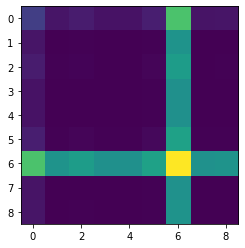

In [193]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

Xtrain  =  ret
#Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(sample_range=(0,1))
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)
s = len(grt)
#
plt.imshow(im_train[655])
plt.show()


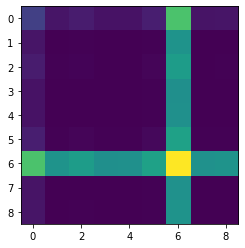

In [195]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

Xtrain  =  ret
#Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField(sample_range=(0,1))
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)
s = len(grt)
#
plt.imshow(im_train[656])
plt.show()


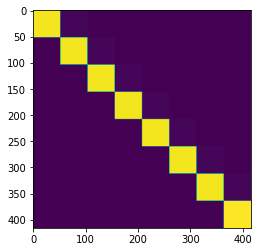

In [66]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

Xtrain = series # both N x T time series samples

mtf = MarkovTransitionField()
im_train = mtf.fit_transform(Xtrain)
#im_test = mtf.transform(Xtest)

# plot one image
plt.imshow(im_train[0])
plt.show()

In [9]:
data = {
    "name" : ['alice', 'bob', 'tom', 'smith', 'jones', 'ben'],
    "phonenumber" : [123456,234567,345678,456789,567890,678901],
    "Age" : [20,21,22,18,19,23],
    "Branch" : ['CSE', 'ECE', 'IT', 'EEE', 'MECH', 'CIVIL'],
    "Redgnumber" : [101,102,103,104,105,106],
    "Year":[1,2,2,3,4,1]
}
df = pd.DataFrame(data)
print(df.loc[[5,1,3,2]].loc[1]["Age"])

21


In [5]:
import pandas as pd
import numpy as np

In [7]:
s = pd.Series(np.random.randn(4))
print(s.ndim)

1


In [10]:
import sys
arr_1 = ([[1,4,9,16],[25,39,25,2,3],[1,54,96,236,458]])
arr=np.array(arr_1)
arr_2=np.array([1,23,4545,3,5,5648])
for array in arr.flat:
    print(array)
print(arr_2.argmax(),arr.argsort())
print(arr.ndim,arr.size,arr_2.nbytes)

[1, 4, 9, 16]
[25, 39, 25, 2, 3]
[1, 54, 96, 236, 458]
5 [0 2 1]
1 3 24


In [11]:
from numpy import random
import matplotlib.pyplot as plt
sum=0
base_array = np.array([1,3,5,6,4,8])
temp=base_array
plt.show()
for i in range(temp-2,-1,-1):
    sum=sum+arr
def con(n1,n2):
    return n1+n2
con = np.frompyfunc(con, 2,1)
arr = np.arange(1,7)
while(arr.all()!=0):
    for num in range (base_array):
        print(con)
con(1,2)
print(sum)

TypeError: only integer scalar arrays can be converted to a scalar index